In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import matplotlib.pyplot as plt

In [3]:
from google.colab import drive

In [4]:
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras import layers
from keras import models
from keras.models import load_model
from keras import backend as K

In [5]:
import tensorflow as tf

In [6]:
keras.__version__ , tf.__version__

('2.4.3', '2.4.1')

In [7]:
tf.test.gpu_device_name()

!nvidia-smi

Tue Mar 23 04:08:13 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.56       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   49C    P0    29W /  70W |    222MiB / 15109MiB |      1%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [8]:
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
!ls -l '/content/drive/My Drive/Colab Notebooks/datasets/'

total 1741130
-rw------- 1 root root      20066 Mar  4 04:45 cat.1700.jpg
-rw------- 1 root root   68787205 Mar  9 04:06 creditCardFraud.zip
-rw------- 1 root root   90618980 Mar  4 04:51 dogs_and_cats_small.zip
drwx------ 2 root root       4096 Mar  9 04:27 image
-rw------- 1 root root    8204887 Mar  4 04:45 Images_500.zip
-rw------- 1 root root    4240457 Mar 15 04:25 Kaggle_Customer_Satisfaction.zip
-rw------- 1 root root   12929865 Mar  4 04:42 Logo_Data.zip
-rw------- 1 root root   18272469 Mar  4 04:50 MNIST.csv
-rw------- 1 root root   23715344 Mar  7 07:08 Online_Retail.xlsx
-rw------- 1 root root        741 Mar  4 04:44 PII.csv
-rw------- 1 root root 1141460846 Mar  4 04:50 waferImages.zip
-rw------- 1 root root  414658234 Mar  4 04:49 yolo_weight.zip


In [ ]:
!unzip /content/drive/My\ Drive/Colab\ Notebooks/datasets/Logo_Data.zip

In [11]:
!ls -l

total 16
drwx------  5 root root 4096 Mar 23 04:08 drive
drwxr-xr-x  1 root root 4096 Mar 18 13:36 sample_data
drwxr-xr-x 29 root root 4096 Mar 23 04:09 test
drwxr-xr-x 29 root root 4096 Mar 23 04:09 train


In [181]:
train_dir = 'train'
val_dir = 'test'
test_dir = 'test'

In [182]:
generator = ImageDataGenerator(rescale = 1./255)

train_generator = generator.flow_from_directory(
    train_dir,
    batch_size = 8,
    target_size = (75, 75),
    class_mode = 'categorical'
)

val_generator = generator.flow_from_directory(
    val_dir,
    batch_size = 8,
    target_size = (75, 75),
    class_mode = 'categorical'
)

Found 498 images belonging to 27 classes.
Found 177 images belonging to 27 classes.


In [180]:
for data_batch, labels_batch in train_generator :
  print(data_batch.shape)
  print(labels_batch.shape)
  break

(8, 75, 75, 3)
(8, 27)


In [183]:
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation = 'relu',
                        input_shape = (75, 75, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(512, activation = 'relu'))
model.add(layers.Dense(27, activation = 'softmax'))

In [184]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 73, 73, 32)        896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 15, 15, 128)       73856     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 7, 7, 128)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 6272)             

In [185]:
model.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

In [167]:
K.clear_session()

In [186]:
Hist_logo = model.fit(train_generator,
                      steps_per_epoch = 62,
                      validation_data = val_generator,
                      validation_steps = 22,
                      epochs = 100)

Epoch 1/100
62/62 [==============================] - 2s 18ms/step - loss: 3.2992 - accuracy: 0.0506 - val_loss: 2.8645 - val_accuracy: 0.1932
Epoch 2/100
62/62 [==============================] - 1s 15ms/step - loss: 2.6841 - accuracy: 0.2578 - val_loss: 2.5442 - val_accuracy: 0.3182
Epoch 3/100
62/62 [==============================] - 1s 16ms/step - loss: 2.1245 - accuracy: 0.4013 - val_loss: 2.2372 - val_accuracy: 0.4148
Epoch 4/100
62/62 [==============================] - 1s 16ms/step - loss: 1.4464 - accuracy: 0.5518 - val_loss: 1.8676 - val_accuracy: 0.5511
Epoch 5/100
62/62 [==============================] - 1s 16ms/step - loss: 0.8879 - accuracy: 0.7791 - val_loss: 1.8185 - val_accuracy: 0.5455
Epoch 6/100
62/62 [==============================] - 1s 16ms/step - loss: 0.4772 - accuracy: 0.8599 - val_loss: 2.1926 - val_accuracy: 0.5000
Epoch 7/100
62/62 [==============================] - 1s 16ms/step - loss: 0.1745 - accuracy: 0.9651 - val_loss: 2.3728 - val_accuracy: 0.5284
Epoch 

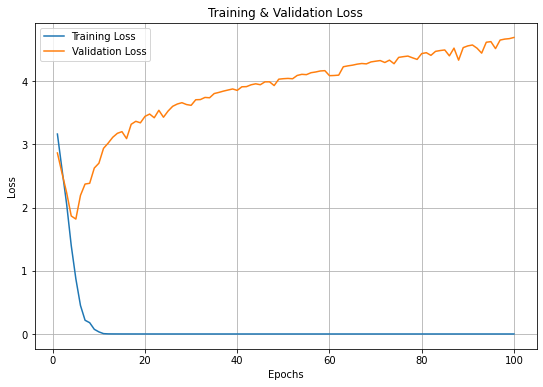

In [187]:
epochs = range(1, len(Hist_logo.history['loss']) + 1)

plt.figure(figsize = (9, 6))
plt.plot(epochs, Hist_logo.history['loss'])
plt.plot(epochs, Hist_logo.history['val_loss'])

plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss' , 'Validation Loss'])
plt.grid()
plt.show()

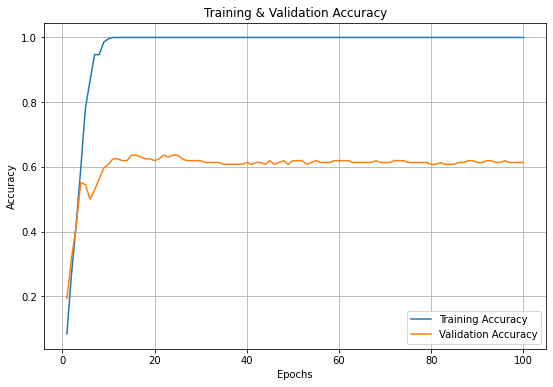

In [190]:
import matplotlib.pyplot as plt

epochs = range(1, len(Hist_logo.history['loss']) + 1)

plt.figure(figsize = (9, 6))
plt.plot(epochs, Hist_logo.history['accuracy'])
plt.plot(epochs, Hist_logo.history['val_accuracy'])

plt.title('Training & Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.grid()
plt.show()

In [188]:
test_datagen = ImageDataGenerator(rescale = 1./255)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size = (75, 75),
    batch_size = 8,
    class_mode = 'categorical'
)

Found 177 images belonging to 27 classes.


In [189]:
loss, accuracy = model.evaluate(test_generator,
                                steps = 22)

print('Loss: {:.5f}' .format(loss))
print('Accuracy: {:.5f}' .format(accuracy))

22/22 [==============================] - 0s 10ms/step - loss: 4.6925 - accuracy: 0.6136
Loss: 4.69246
Accuracy: 0.61364
